In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from temporalanalysis.temporal_analysis_ab import compute_avg_behavior, plot_avg_behavior, load_dataset, compute_phase_matrix, plot_phase_matrix

In [66]:
node = 9
#fn = '/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/PhaseAB_Channel11_power7/2016-10-04_NODE%d.csv' % node
#fn = '/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/AB_Power7_Channel11_MoteC/2016-10-04_NODE%d.csv' % node
fn = '/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/AB_Channel11_Power7_MoteA/2016-10-05_NODE%d.csv'% node
#fn = '/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/bad/AB_Power7_Channel11/2016-09-25_NODE%d.csv' % node

df = load_dataset(fn)
# x = df.groupby(['phase1', 'phase2'])
# c = 0
# for index, value in x:
#     print(c, index)
#     c = c + 1


OSError: File b'/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/AB_Channel11_Power7_MoteA/2016-10-05_NODE9.csv' does not exist

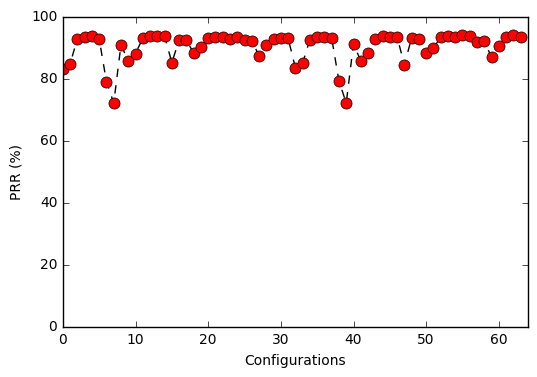

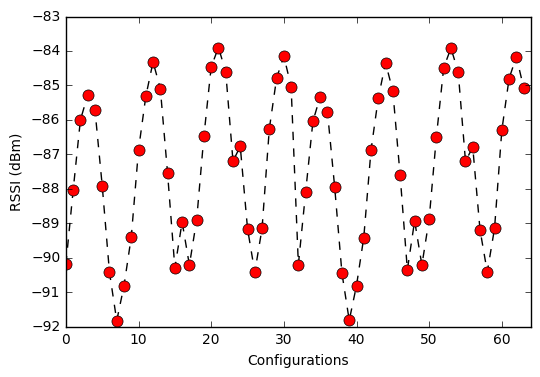

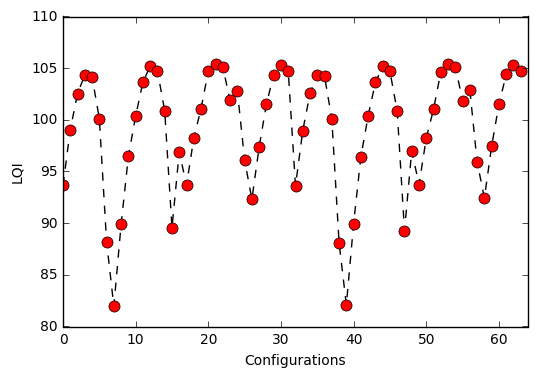

In [58]:
plot_avg_behavior(df)

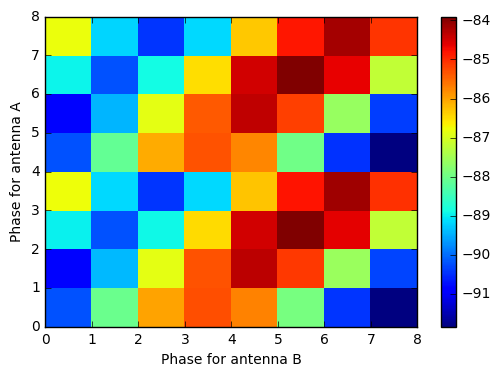

In [59]:
M = compute_phase_matrix(df)
plot_phase_matrix(M)
plt.savefig('figures/phase_matrix_%d.pdf' % node)

In [60]:
# compute the variation across different groups
rssi_g = df[['rssi', 'phase1', 'phase2']]
rssi_g = rssi_g.groupby(['phase1', 'phase2'])
rssi_g.describe()
D = []
for x in range(7):
    phase1 = (x + 1) * 32
    phase2 = x * 32 #(7 - x) * 32
    vals = rssi_g.get_group((phase1, phase2))
    D.append(np.mean(vals.values))

D, np.std(D)
    


([-90.816446578631457,
  -90.217329713138938,
  -90.427285646612987,
  -85.324681398339763,
  -84.342335001746008,
  -83.915929203539818,
  -84.165680473372788],
 3.0253976384662007)

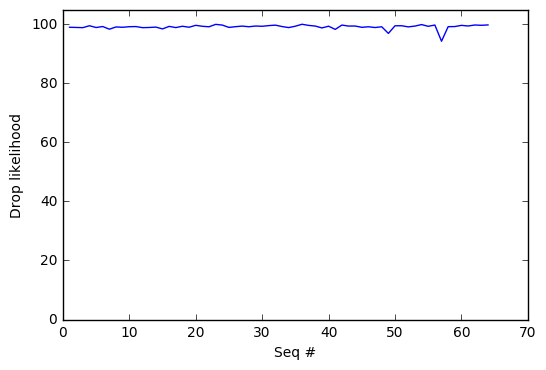

In [61]:
gi = df.groupby(['sender_seq'])
plt.plot(gi.count().rssi / max(gi.count().rssi) * 100)
plt.ylim(0,105)
plt.xlabel('Seq #')
plt.ylabel('Drop likelihood')
plt.savefig('figures/losses.pdf')

In [62]:
# p = df[['phase1', 'phase2', 'sender_seq']]
# # p
# g = p.groupby(['phase1', 'phase2'])
# for index, vals in g:
#     #print(vals)
#     plt.figure()
#     plt.hist(vals.sender_seq.values, 64)
#     plt.title('%d,%d s=%d' % (index[0], index[1], len(vals)))
#     #break

The graph plots the RSSI for different antenna correlations. The graph clearly shows that the correlations between the configurations that are parallel to the antidiagonal of the matrix. This suggests that not all the phases are necessary to find high quality RSSI links. Instead a small subset is sufficient. 

Several open questions remain:
 * what produces this phenomena and should we expect it to behave the same way in differen environemnts, different channels, power levels, etc.
 * is there a single best configuration or there are many that are best.
 * what is the best way to pick several configurations? 

In [64]:
C = {}
for node in range(16):
    
#     fn = '/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/PhaseAB_Channel11_power7/2016-10-04_NODE%d.csv' % node
    #fn = '/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/AB_Power7_Channel11_MoteC/2016-10-04_NODE%d.csv' % node
    fn = '/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/AB_Channel11_Power7_MoteB/2016-10-05_NODE%d.csv'% node
    #fn = '/Users/ochipara/Working/DirectionalAntennas/data/testbed/d/tx_temporal/bad/AB_Power7_Channel11/2016-09-25_NODE%d.csv' % node
    
    print('node', node)
    df = load_dataset(fn)
    C[node] = compute_phase_matrix(df)
    plot_phase_matrix(C[node])
    plt.savefig('figures/phase_matrix_%d.pdf' % node)

node 0


OSError: File b'/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/AB_Channel11_Power7_MoteB/2016-10-05_NODE0.csv' does not exist

In [65]:
D = np.zeros((8,8))
for node in range(16):
    tmp = np.max(C[node]) - C[node]
    D = D + tmp
D = D / 16
plt.pcolor(D)
plt.colorbar()

KeyError: 0

In [ ]:
D[(6,6)]

2.8276608109999515

In [ ]:
#rssi, lqi, prr = compute_avg_behavior('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/AB_Power7_Channel11_MoteC/2016-10-04_NODE')
#rssi, lqi, prr = compute_avg_behavior('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/PhaseAB_Channel11_power7/2016-10-04_NODE')
rssi, lqi, prr = compute_avg_behavior('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/AB_Channel11_Power7_MoteA/2016-10-05_NODE')

Computing node 0
Computing node 1
Computing node 2
Computing node 3
Computing node 4
Computing node 5
Computing node 6
Computing node 7
Computing node 8
Computing node 9
Computing node 10
Computing node 11


In [ ]:
# TODO: to this with a boxplot
plt.figure()
plt.bar(np.arange(16), [np.max(rssi[n].values) - np.min(rssi[n].values) for n in range(16)], .8)
plt.xticks(np.arange(16) + .4, range(16))
plt.ylabel('RSSI (dBm)')
plt.xlabel('Node ID')


plt.figure()
plt.bar(np.arange(16), [np.max(lqi[n].values) - np.min(lqi[n].values) for n in range(16)], .8)
plt.xticks(np.arange(16) + .4, range(16))
plt.ylabel('LQI')
plt.xlabel('Node ID')


plt.figure()
plt.bar(np.arange(16), [np.max(prr[n].values) - np.min(prr[n].values) for n in range(16)], .8)
plt.xticks(np.arange(16) + .4, range(16))
plt.ylim(0,100)
plt.ylabel('PRR (%)')
plt.xlabel('Node ID')




In [ ]:
fn = '/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/AB_Power7_Channel11/2016-09-25_NODE4.csv'
fn = '/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/PhaseAB_Channel11_power7/2016-10-04_NODE0.csv'


df = load_dataset(fn)

In [ ]:
r1 = df[df['round'] == 1]
r1 = r1[['sender_seq', 'rssi']]

In [19]:
r1['sender_seq2'] = r1.sender_seq

In [20]:
x = pd.merge(r1, r1, on=['sender_seq'])

In [21]:
x

sender_seq  rssi_x  sender_seq2_x  rssi_y  sender_seq2_y
0            1     -89              1     -89              1
1            3     -86              3     -86              3
2            4     -85              4     -85              4
3            5     -92              5     -92              5
4            6     -89              6     -89              6
5            8     -89              8     -89              8
6            9     -88              9     -88              9
7           11     -91             11     -91             11
8           12     -92             12     -92             12
9           13     -88             13     -88             13
10          16     -89             16     -89             16
11          17     -89             17     -89             17
12          18     -91             18     -91             18
13          20     -86             20     -86             20
14          21     -87             21     -87             21
15          23     -88             23     -88             23
16          24     -88             24     -88             24
17          25     -87             25     -87             25
18          27     -83             27     -83             27
19          28     -89             28     -89             28
20          29     -88             29     -88             29
21          31     -91             31     -91             31
22          32     -86             32     -86             32
23          33     -89             33     -89             33
24          34     -89             34     -89             34
25          36     -91             36     -91             36
26          38     -89             38     -89             38
27          39     -85             39     -85             39
28          41     -86             41     -86             41
29          43     -88             43     -88             43
30          45     -90             45     -90             45
31          46     -91             46     -91             46
32          49     -86             49     -86             49
33          50     -87             50     -87             50
34          52     -87             52     -87             52
35          53     -90             53     -90             53
36          54     -84             54     -84             54
37          56     -87             56     -87             56
38          57     -90             57     -90             57
39          58     -92             58     -92             58
40          61     -85             61     -85             61
41          62     -91             62     -91             62
42          63     -85             63     -85             63
43          64     -85             64     -85             64